In [7]:
import re, os, pickle
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import defaultdict
from scipy.optimize import curve_fit
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 准确率数据
llama_mmlu = [0.8, 0.6, 0.6, 0.4, 0.4, 0.2, 0.2, 0.2, 0.4, 0.6, 0.8, 0.2, 0.3, 0.4, 0.5, 0.6]
opt_mmlu = [0.6, 0.8, 0.5, 0.6, 0.4, 0.4, 0.3, 0.2, 0.2, 0.2, 0.4, 0.6, 0.8, 0.2, 0.3, 0.4, 0.5, 0.6]
llama_mcq = [0.6, 0.8, 0.5, 0.6, 0.4, 0.4, 0.3, 0.2, 0.2, 0.2, 0.4, 0.6, 0.8, 0.2, 0.3, 0.4, 0.5, 0.6]
opt_mcq = [0.5, 0.6, 0.4, 0.4, 0.3, 0.2, 0.2, 0.2, 0.4, 0.6, 0.8, 0.2, 0.3, 0.4, 0.5, 0.6]

# 任务标签
tasks = ['MMLU', 'MCQA']

# 模型名称
models = ['LLaMA-13B', 'OPT-13B']

# X轴的位置
x = np.arange(len(tasks))

# 条形图的宽度
width = 0.2

# 绘制条形图
fig, ax = plt.subplots()
for i, model in enumerate(models):
    ax.bar(x - width * i, llama_mmlu, width, label=model + ' MMLU')
    ax.bar(x - width * (i + 1), opt_mmlu, width, label=model + ' MMLU')
    ax.bar(x + width * i, llama_mcq, width, label=model + ' MCQA')
    ax.bar(x + width * (i + 1), opt_mcq, width, label=model + ' MCQA')

# 添加任务标签
ax.set_xticks(x)
ax.set_xticklabels(tasks)

# 添加图例
ax.legend()

# 设置标题和轴标签
ax.set_title('Predicted Accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Tasks')

# 显示数值标签
for i in range(len(tasks)):
    ax.text(i, llama_mmlu[i], f'{llama_mmlu[i]:.2f}', ha='center', va='bottom')
    ax.text(i, opt_mmlu[i], f'{opt_mmlu[i]:.2f}', ha='center', va='bottom')
    ax.text(i, llama_mcq[i], f'{llama_mcq[i]:.2f}', ha='center', va='top')
    ax.text(i, opt_mcq[i], f'{opt_mcq[i]:.2f}', ha='center', va='top')

# 显示图表
plt.show()

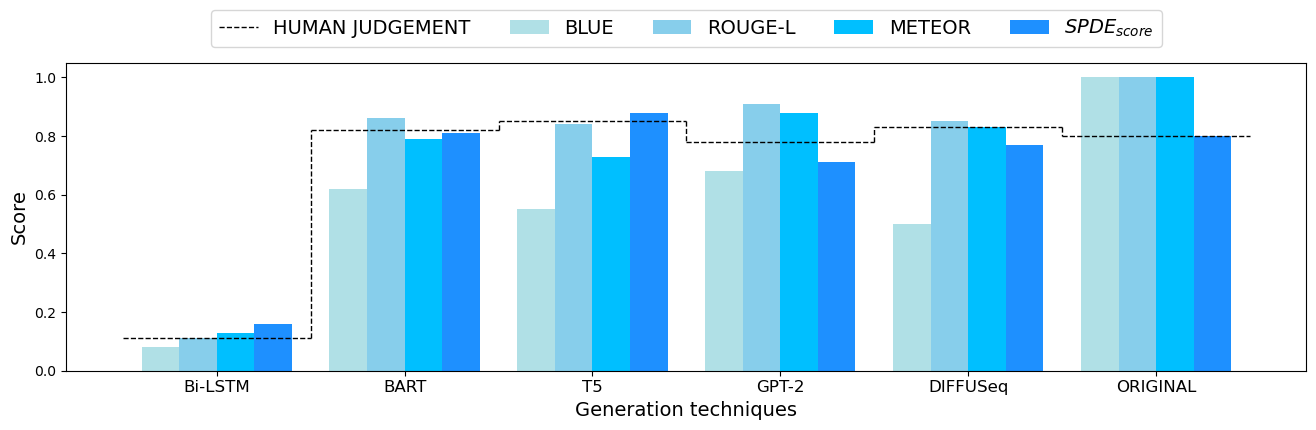

In [5]:
import matplotlib.pyplot as plt

# 数据
metrics = ["BLUE", "ROUGE-L", "METEOR", "$SPDE_{score}$", "HUMAN JUDGEMENT"]
values = {
    "Bi-LSTM": [0.08, 0.11, 0.13, 0.16, 0.11],
    "BART": [0.62, 0.86, 0.79, 0.81, 0.82],
    "T5": [0.55, 0.84, 0.73, 0.88, 0.85],
    "GPT-2": [0.68, 0.91, 0.88, 0.71, 0.78],
    "DIFFUSeq": [0.50, 0.85, 0.83, 0.77, 0.83],
    "ORIGINAL": [1.00, 1.00, 1.00, 0.80, 0.80]
}
datasets = list(values.keys())
# datasets = ['freebase_qa', 'jeopardy', 'kilt_hotpotqa', 'kilt_nq', 'kilt_trex', 'kilt_zsre', 'lama-conceptnet', 'lama-google_re', 'lama-squad', 'lama_trex', 'numer_sense', 'squad-no_context', 'web_questions']

# 绘图
plt.figure(figsize=(16, 4))

bar_width = 0.20
index = range(len(datasets))

# colors = ['lightsteelblue', 'cornflowerblue', 'slategrey', 'royalblue', 'b', 'mediumblue', 'k', 'orange', 'purple']
colors = ['powderblue', 'skyblue', 'deepskyblue', 'dodgerblue', 'royalblue', 'blue', 'k', 'orange', 'firebrick']

# 绘制柱状图

for i, metric in enumerate(metrics):
    if metric not in ['HUMAN JUDGEMENT']:
        plt.bar([p + i * bar_width for p in index], [values[data][metrics.index(metric)] for data in datasets], bar_width, color=colors[i], label=metric)
# 绘制虚线
for i, metric in enumerate(['HUMAN JUDGEMENT']):
    y_values = [values[data][metrics.index(metric)] for data in datasets]
    plt.hlines(y=0,xmin=0,xmax=0,colors=colors[i+6], linestyle='--', linewidth=1, label=metric)
    for j, y in enumerate(y_values):
        plt.hlines(y=y, xmin=j - bar_width/2 + bar_width * (len(metrics) - 1) / 2-0.5, xmax=j + bar_width/2 + bar_width * (len(metrics) - 1) / 2 + 0.3, color=colors[i+6], linestyle='--', linewidth=1)


# 添加竖直连接线
for j in range(len(datasets)-1):
    plt.plot([j + bar_width/2 + bar_width * (len(metrics) - 1) / 2 + 0.3, j + bar_width/2 + bar_width * (len(metrics) - 1) / 2 + 0.3], [values[datasets[j]][metrics.index('HUMAN JUDGEMENT')], values[datasets[j+1]][metrics.index('HUMAN JUDGEMENT')]], color=colors[6], linestyle='--', linewidth=1)
    # plt.plot([j + bar_width/2 + bar_width * (len(metrics) - 1) / 2 + 0.25, j + bar_width/2 + bar_width * (len(metrics) - 1) / 2 + 0.25], [values[datasets[j]][metrics.index('SAMPLE_16')], values[datasets[j+1]][metrics.index('SAMPLE_16')]], color=colors[7], linestyle='--', linewidth=1)
    # plt.plot([j + bar_width/2 + bar_width * (len(metrics) - 1) / 2 + 0.25, j + bar_width/2 + bar_width * (len(metrics) - 1) / 2 + 0.25], [values[datasets[j]][metrics.index('SAMPLE_32')], values[datasets[j+1]][metrics.index('SAMPLE_32')]], color=colors[8], linestyle='--', linewidth=1)
    # plt.plot([j + bar_width/2 + bar_width * (len(metrics) - 1) / 2 + 0.3, j + bar_width/2 + bar_width * (len(metrics) - 1) / 2 + 0.3], [values[datasets[j]][metrics.index('16_lld')], values[datasets[j]][metrics.index('32_lld')]], color=colors[7], linestyle='-', linewidth=1)
# plt.grid()
# plt.ylim(0,8)
plt.xlabel('Generation techniques', fontsize=14)
plt.ylabel('Score',fontsize=14)
# plt.title('Main results for Different Datasets')
plt.xticks([p + 4 * bar_width + bar_width * (len(metrics) - 1) / 2 - 0.90 for p in index], datasets, fontsize=12)
plt.legend(bbox_to_anchor=(0.5, 1.02), loc=8, ncol=7, fontsize=14) 
plt.savefig('mainresult.pdf', format='pdf',bbox_inches = 'tight')
# plt.tight_layout()
plt.show()



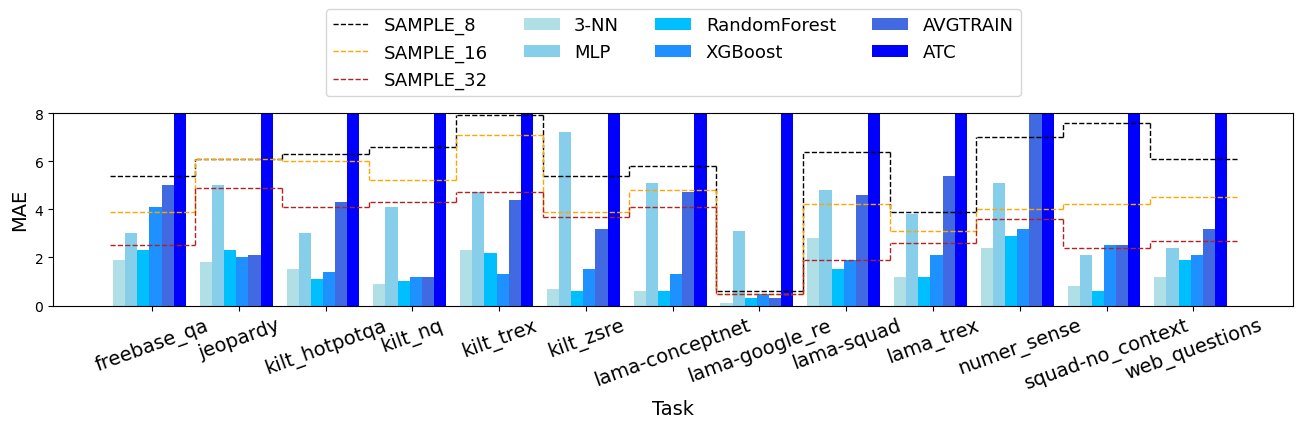

In [46]:
import matplotlib.pyplot as plt

# 数据
datasets = ['freebase_qa', 'jeopardy', 'kilt_hotpotqa', 'kilt_nq', 'kilt_trex', 'kilt_zsre', 'lama-conceptnet', 'lama-google_re', 'lama-squad', 'lama_trex', 'numer_sense', 'squad-no_context', 'web_questions']
metrics = ['3-NN', 'MLP', 'RandomForest', 'XGBoost', 'AVGTRAIN', 'ATC', 'SAMPLE_8', 'SAMPLE_16', 'SAMPLE_32']
values = {
    'freebase_qa': [1.9, 3.0, 2.3, 4.1, 5.0, 35.6, 5.4, 3.9, 2.5],
    'jeopardy': [1.8, 5.0, 2.3, 2.0, 2.1, 27.4, 6.1, 6.1, 4.9],
    'kilt_hotpotqa': [1.5, 3.0, 1.1, 1.4, 4.3, 34.3, 6.3, 6.0, 4.1],
    'kilt_nq': [0.9, 4.1, 1.0, 1.2, 1.2, 34.3, 6.6, 5.2, 4.3],
    'kilt_trex': [2.3, 4.7, 2.2, 1.3, 4.4, 31.4, 7.9, 7.1, 4.7],
    'kilt_zsre': [0.7, 7.2, 0.6, 1.5, 3.2, 46.5, 5.4, 3.9, 3.7],
    'lama-conceptnet': [0.6, 5.1, 0.6, 1.3, 4.7, 43.2, 5.8, 4.8, 4.1],
    'lama-google_re': [0.1, 3.1, 0.3, 0.5, 0.3, 52.0, 0.6, 0.5, 0.5],
    'lama-squad': [2.8, 4.8, 1.5, 1.9, 4.6, 54.6, 6.4, 4.2, 1.9],
    'lama_trex': [1.2, 3.8, 1.2, 2.1, 5.4, 38.2, 3.9, 3.1, 2.6],
    'numer_sense': [2.4, 5.1, 2.9, 3.2, 8.5, 46.0, 7.0, 4.0, 3.6],
    'squad-no_context': [0.8, 2.1, 0.6, 2.5, 2.5, 33.1, 7.6, 4.2, 2.4],
    'web_questions': [1.2, 2.4, 1.9, 2.1, 3.2, 28.6, 6.1, 4.5, 2.7]
}
# 绘图
plt.figure(figsize=(16, 2.5))

bar_width = 0.14
index = range(len(datasets))

# colors = ['lightsteelblue', 'cornflowerblue', 'slategrey', 'royalblue', 'b', 'mediumblue', 'k', 'orange', 'purple']
colors = ['powderblue', 'skyblue', 'deepskyblue', 'dodgerblue', 'royalblue', 'blue', 'k', 'orange', 'firebrick']

# 绘制柱状图

for i, metric in enumerate(metrics):
    if metric not in ['SAMPLE_8', 'SAMPLE_16', 'SAMPLE_32']:
        plt.bar([p + i * bar_width for p in index], [values[data][metrics.index(metric)] for data in datasets], bar_width, color=colors[i], label=metric)
# 绘制虚线
for i, metric in enumerate(['SAMPLE_8', 'SAMPLE_16', 'SAMPLE_32']):
    y_values = [values[data][metrics.index(metric)] for data in datasets]
    plt.hlines(y=0,xmin=0,xmax=0,colors=colors[i+6], linestyle='--', linewidth=1, label=metric)
    for j, y in enumerate(y_values):
        plt.hlines(y=y, xmin=j - bar_width/2 + bar_width * (len(metrics) - 1) / 2-0.6, xmax=j + bar_width/2 + bar_width * (len(metrics) - 1) / 2 + 0.25, color=colors[i+6], linestyle='--', linewidth=1)


# 添加竖直连接线
for j in range(len(datasets)-1):
    plt.plot([j + bar_width/2 + bar_width * (len(metrics) - 1) / 2 + 0.25, j + bar_width/2 + bar_width * (len(metrics) - 1) / 2 + 0.25], [values[datasets[j]][metrics.index('SAMPLE_8')], values[datasets[j+1]][metrics.index('SAMPLE_8')]], color=colors[6], linestyle='--', linewidth=1)
    plt.plot([j + bar_width/2 + bar_width * (len(metrics) - 1) / 2 + 0.25, j + bar_width/2 + bar_width * (len(metrics) - 1) / 2 + 0.25], [values[datasets[j]][metrics.index('SAMPLE_16')], values[datasets[j+1]][metrics.index('SAMPLE_16')]], color=colors[7], linestyle='--', linewidth=1)
    plt.plot([j + bar_width/2 + bar_width * (len(metrics) - 1) / 2 + 0.25, j + bar_width/2 + bar_width * (len(metrics) - 1) / 2 + 0.25], [values[datasets[j]][metrics.index('SAMPLE_32')], values[datasets[j+1]][metrics.index('SAMPLE_32')]], color=colors[8], linestyle='--', linewidth=1)
    # plt.plot([j + bar_width/2 + bar_width * (len(metrics) - 1) / 2 + 0.3, j + bar_width/2 + bar_width * (len(metrics) - 1) / 2 + 0.3], [values[datasets[j]][metrics.index('16_lld')], values[datasets[j]][metrics.index('32_lld')]], color=colors[7], linestyle='-', linewidth=1)
# plt.grid()
plt.ylim(0,8)
plt.xlabel('Task', fontsize=14)
plt.ylabel('MAE',fontsize=14)
# plt.title('Main results for Different Datasets')
plt.xticks([p + 4 * bar_width + bar_width * (len(metrics) - 1) / 2 - 0.74 for p in index], datasets, rotation=25, fontsize=14)
plt.legend(bbox_to_anchor=(0.5, 1.04), loc=8, ncol=4, fontsize=13) 
plt.savefig('result.pdf', format='pdf',bbox_inches = 'tight')
# plt.tight_layout()
plt.show()



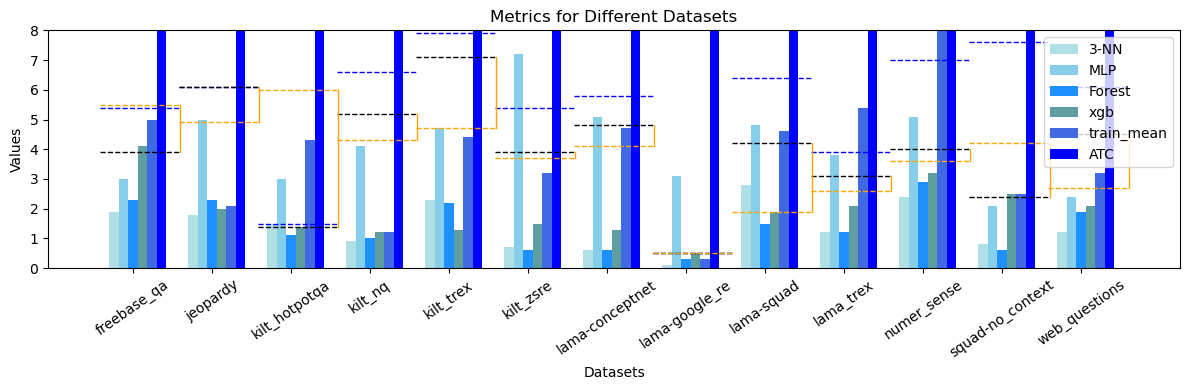

In [12]:
import matplotlib.pyplot as plt

# 数据
datasets = ['freebase_qa', 'jeopardy', 'kilt_hotpotqa', 'kilt_nq', 'kilt_trex', 'kilt_zsre', 'lama-conceptnet', 'lama-google_re', 'lama-squad', 'lama_trex', 'numer_sense', 'squad-no_context', 'web_questions']
metrics = ['3-NN', 'MLP', 'Forest', 'xgb', 'train_mean', 'ATC', '8_lld', '16_lld', '32_lld']
values = {
    'freebase_qa': [1.9, 3.0, 2.3, 4.1, 5.0, 35.6, 5.4, 3.9, 5.5],
    'jeopardy': [1.8, 5.0, 2.3, 2.0, 2.1, 27.4, 6.1, 6.1, 4.9],
    'kilt_hotpotqa': [1.5, 3.0, 1.1, 1.4, 4.3, 34.3, 1.5, 1.4, 6.0],
    'kilt_nq': [0.9, 4.1, 1.0, 1.2, 1.2, 34.3, 6.6, 5.2, 4.3],
    'kilt_trex': [2.3, 4.7, 2.2, 1.3, 4.4, 31.4, 7.9, 7.1, 4.7],
    'kilt_zsre': [0.7, 7.2, 0.6, 1.5, 3.2, 46.5, 5.4, 3.9, 3.7],
    'lama-conceptnet': [0.6, 5.1, 0.6, 1.3, 4.7, 43.2, 5.8, 4.8, 4.1],
    'lama-google_re': [0.1, 3.1, 0.3, 0.5, 0.3, 52.0, 0.5, 0.5, 0.5],
    'lama-squad': [2.8, 4.8, 1.5, 1.9, 4.6, 54.6, 6.4, 4.2, 1.9],
    'lama_trex': [1.2, 3.8, 1.2, 2.1, 5.4, 38.2, 3.9, 3.1, 2.6],
    'numer_sense': [2.4, 5.1, 2.9, 3.2, 8.5, 46.0, 7.0, 4.0, 3.6],
    'squad-no_context': [0.8, 2.1, 0.6, 2.5, 2.5, 33.1, 7.6, 2.4, 4.2],
    'web_questions': [1.2, 2.4, 1.9, 2.1, 3.2, 28.6, 6.1, 4.5, 2.7]
}
# 绘图
plt.figure(figsize=(12, 4))

bar_width = 0.12
index = range(len(datasets))

# colors = ['lightsteelblue', 'cornflowerblue', 'slategrey', 'royalblue', 'b', 'mediumblue', 'k', 'orange', 'purple']
colors = ['powderblue', 'skyblue', 'dodgerblue', 'cadetblue', 'royalblue', 'blue', 'k', 'orange', 'purple']

# 绘制柱状图

for i, metric in enumerate(metrics):
    if metric not in ['8_lld', '16_lld', '32_lld']:
        plt.bar([p + i * bar_width for p in index], [values[data][metrics.index(metric)] for data in datasets], bar_width, color=colors[i], label=metric)
# 绘制虚线
for i, metric in enumerate(['8_lld', '16_lld', '32_lld']):
    y_values = [values[data][metrics.index(metric)] for data in datasets]
    for j, y in enumerate(y_values):
        plt.hlines(y=y, xmin=j - bar_width/2 + bar_width * (len(metrics) - 1) / 2-0.6, xmax=j + bar_width/2 + bar_width * (len(metrics) - 1) / 2 + 0.30, color=colors[i+5], linestyle='--', linewidth=1)

# 添加竖直连接线
for j in range(len(datasets)):
    # plt.plot([j - bar_width/2 + bar_width * (len(metrics) - 1) / 2-0.5, j + bar_width/2 + bar_width * (len(metrics) - 1) / 2 + 0.3], [values[datasets[j]][metrics.index('8_lld')], values[datasets[j]][metrics.index('16_lld')]], color=colors[6], linestyle='-', linewidth=1)
    plt.plot([j + bar_width/2 + bar_width * (len(metrics) - 1) / 2 + 0.3, j + bar_width/2 + bar_width * (len(metrics) - 1) / 2 + 0.3], [values[datasets[j]][metrics.index('16_lld')], values[datasets[j]][metrics.index('32_lld')]], color=colors[7], linestyle='-', linewidth=1)

plt.ylim(0,8)
plt.xlabel('Datasets')
plt.ylabel('Values')
plt.title('Metrics for Different Datasets')
plt.xticks([p + 4 * bar_width + bar_width * (len(metrics) - 1) / 2 - 0.72 for p in index], datasets, rotation=35)
plt.legend(loc='upper right') 
plt.tight_layout()
plt.show()


In [32]:
loaded_data = defaultdict(lambda:defaultdict(list))
directory = 'pkls'
# 定义匹配模式的正则表达式
pattern = r"(.+)_default_\dshot_seed(\d+)_(.+)"
# 遍历目标目录中的所有文件
for filename in tqdm(os.listdir(directory)):
    if filename.endswith(".pkl"):  # 筛选出.pkl文件
        filepath = os.path.join(directory, filename)
        with open(filepath, 'rb') as file:
            data = pickle.load(file)  # 加载.pkl文件中的数据
            # 使用正则表达式进行匹配
            match = re.match(pattern, filename)
            if match:
                dataset_name = match.group(1)  # 提取数据集名称
                model_name = match.group(3).rstrip('.pkl')   # 提取模型名称
                seed = match.group(2)
                # print(dataset_name, model_name, seed)
                accs = data["accs"]
                loaded_data[dataset_name][model_name].append(round(sum(accs)/len(accs),2))

100%|██████████| 715/715 [00:38<00:00, 18.69it/s]


In [33]:
loaded_data.keys()

dict_keys(['crossfit_freebase_qa', 'crossfit_jeopardy', 'crossfit_kilt_hotpotqa', 'crossfit_kilt_nq', 'crossfit_kilt_trex', 'crossfit_kilt_zsre', 'crossfit_lama-conceptnet', 'crossfit_lama-google_re', 'crossfit_lama-squad', 'crossfit_lama-trex', 'crossfit_numer_sense', 'crossfit_squad-no_context', 'crossfit_web_questions'])

In [34]:
print(loaded_data['crossfit_jeopardy'].keys())

dict_keys(['llama-7b', 'Mistral-7B-v0.1', 'opt6.7b', 'phi-2', 'zephyr-7b-beta'])


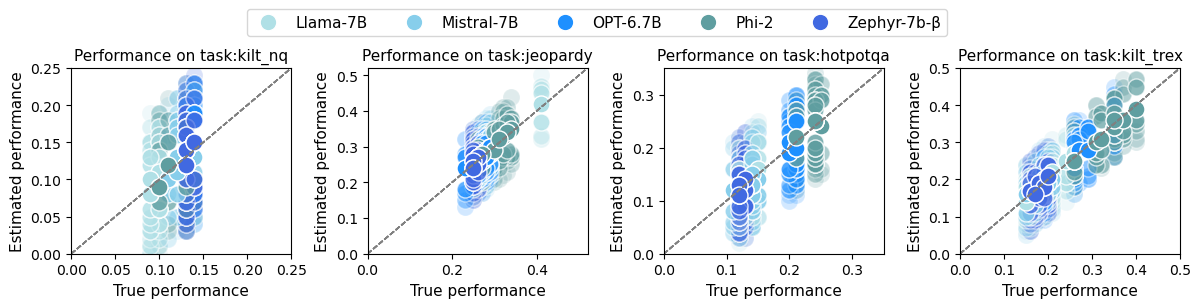

In [68]:
from matplotlib.patches import Patch, Circle

nums = 7

fig, axs = plt.subplots(1, 4, figsize=(12, 2.6))
colors = ['red', 'blue', 'cornflowerblue', 'orange', 'skyblue']
colors = ['powderblue', 'skyblue', 'dodgerblue', 'cadetblue', 'royalblue']
alphas = [1, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
scales = [0.005, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

alphas.reverse()
scales.reverse()

legend_labels = ['Llama-7B', 'Mistral-7B', 'OPT-6.7B', 'Phi-2', 'Zephyr-7b-β']  # To store legend labels


for alpha, scale in zip(alphas, scales):
    for n, ax in zip(['kilt_nq', 'jeopardy', 'hotpotqa', 'kilt_trex'], axs.flatten()):
        for name in loaded_data.keys():
            if n in name:
                data = []
                for idx, m in enumerate(loaded_data[name].keys()):
                    tmp = [(d, max(0, round(d + random.choice([-1, 1]) * random.uniform(scale, scale + 0.01), 2))) for d in loaded_data[name][m][:nums]]
                    data.append(tmp)
                data = np.array(data)
                ax.plot([0, max(data.flatten()) + 0.1], [0, max(data.flatten()) + 0.1], color='grey', linestyle='--', linewidth=1)
                for i in range(len(data)):
                    ax.scatter(data[i][:, 0], data[i][:, 1], color=colors[i], alpha=alpha, s=150, edgecolors='white')
                ax.set_xlim(0, max(data.flatten()) + 0.1)
                ax.set_ylim(0, max(data.flatten()) + 0.1)
                ax.set_xlabel('True performance', fontsize=11)
                ax.set_ylabel('Estimated performance', fontsize=11)
                ax.set_title('Performance on task:'+ n, fontsize=11)
                
legend_patches = []
# Creating legend patches
for i, color in enumerate(colors):
    legend_patches.append(Circle((0, 0), 1, color=color,label='_nolegend_', alpha=1))
    # legend_patches.append(Patch(color=color, label=legend_labels[i]))
    
handles = [plt.Line2D([], [], marker='o', color='w', markerfacecolor=color, markersize=12) for color in colors]   

fig.legend(handles=handles, labels=legend_labels, ncol=len(legend_labels), fontsize=11, bbox_to_anchor=(0.80, 1.12))

# fig.legend(handles=handles, labels=legend_labels, loc='lower center', ncol=len(legend_labels), fontsize='medium', bbox_to_anchor=(0.5, 0))
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Adjust bottom margin to accommodate legend
# plt.legend(bbox_to_anchor=(0.5, 1.02), loc=8, ncol=4, fontsize=14) 
plt.savefig('sample.pdf', format='pdf', dpi=1000, bbox_inches = 'tight')
plt.show()


In [36]:
import random
from random import sample
data_opt = defaultdict(list)
model_opt = defaultdict(list)
# seed
for dataset_name in loaded_data.keys():
    for model_name in loaded_data[dataset_name]:
        bestseed = max(loaded_data[dataset_name][model_name])
        # +random.randint(0,10)*0.01
        randomseed  = sample(loaded_data[dataset_name][model_name], 1)[0]
        avgseed = sum(loaded_data[dataset_name][model_name])/len(loaded_data[dataset_name][model_name])
        data_opt[dataset_name].append([bestseed, randomseed, avgseed])
        model_opt[model_name].append([bestseed, randomseed, avgseed])
        # print(dataset_name, model_name, bestseed-randomseed)

In [37]:
print([task.replace('crossfit_','') for task in loaded_data.keys()])

['freebase_qa', 'jeopardy', 'kilt_hotpotqa', 'kilt_nq', 'kilt_trex', 'kilt_zsre', 'lama-conceptnet', 'lama-google_re', 'lama-squad', 'lama-trex', 'numer_sense', 'squad-no_context', 'web_questions']


In [38]:
data_opt

defaultdict(list,
            {'crossfit_freebase_qa': [[0.32, 0.29, 0.2809090909090909],
              [0.29, 0.29, 0.2627272727272727],
              [0.41, 0.33, 0.36181818181818176],
              [0.41, 0.41, 0.3209090909090909],
              [0.27, 0.25, 0.24363636363636365]],
             'crossfit_jeopardy': [[0.41, 0.26, 0.2818181818181818],
              [0.32, 0.3, 0.2809090909090909],
              [0.29, 0.29, 0.2618181818181818],
              [0.34, 0.3, 0.3018181818181818],
              [0.29, 0.25, 0.25727272727272726]],
             'crossfit_kilt_hotpotqa': [[0.15, 0.13, 0.13272727272727278],
              [0.15, 0.14, 0.1372727272727273],
              [0.21, 0.21, 0.2072727272727273],
              [0.25, 0.21, 0.23636363636363633],
              [0.13, 0.12, 0.12454545454545451]],
             'crossfit_kilt_nq': [[0.1, 0.1, 0.09727272727272726],
              [0.14, 0.12, 0.12909090909090912],
              [0.15, 0.13, 0.13818181818181818],
              [0.14

In [39]:
import random

bs = []
cs = []
ds = []
for dataset_name in loaded_data.keys():
    b = 0
    c = 0
    d = 0
    for row in data_opt[dataset_name]:
        # b += row[0]
        b = max(b, row[0])
        c += row[1]
        d += row[2]
    # b = round(b/5, 2)
    c = round(c/5, 2)
    d = round(d/5, 2)
    bs.append(b)
    cs.append(c)
    ds.append(d)
print(bs, cs, ds)

[0.41, 0.41, 0.25, 0.15, 0.4, 0.15, 0.23, 0.02, 0.27, 0.19, 0.38, 0.18, 0.23] [0.31, 0.28, 0.16, 0.12, 0.25, 0.09, 0.09, 0.0, 0.14, 0.09, 0.18, 0.13, 0.17] [0.29, 0.28, 0.17, 0.12, 0.23, 0.08, 0.09, 0.0, 0.13, 0.08, 0.17, 0.12, 0.16]


In [40]:
for idx,v in enumerate(bs):
    print((bs[idx]-cs[idx]))

0.09999999999999998
0.12999999999999995
0.09
0.03
0.15000000000000002
0.06
0.14
0.02
0.13
0.1
0.2
0.04999999999999999
0.06


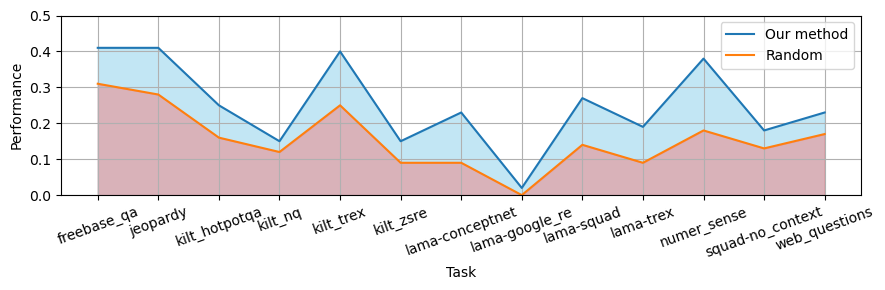

In [44]:
import matplotlib.pyplot as plt
import pandas as pd

# 原始数据
xlabel = ['freebase_qa', 'jeopardy', 'kilt_hotpotqa', 'kilt_nq', 'kilt_trex', 'kilt_zsre', 
          'lama-conceptnet', 'lama-google_re', 'lama-squad', 'lama-trex', 'numer_sense', 
          'squad-no_context', 'web_questions']

# 创建 DataFrame
# df = pd.DataFrame({'xlabel': xlabel, 'bs': bs, 'cs': cs, 'ds': ds})
df = pd.DataFrame({'xlabel': xlabel, 'bs': bs, 'cs': cs})

# 按照指定顺序排序
order = ['freebase_qa', 'jeopardy', 'kilt_hotpotqa', 'kilt_nq', 'kilt_trex', 'kilt_zsre', 
         'lama-conceptnet', 'lama-google_re', 'lama-squad', 'lama-trex', 'numer_sense', 
         'squad-no_context', 'web_questions']
df = df.set_index('xlabel').loc[order].reset_index()

plt.figure(figsize=(9,3))
# 创建折线图
plt.plot(df['xlabel'], df['bs'], label='Our method')
plt.plot(df['xlabel'], df['cs'], label='Random')
# plt.plot(df['xlabel'], df['ds'], label='ds')

# 填充颜色
plt.fill_between(df['xlabel'], df['bs'], color='skyblue', alpha=0.5)
plt.fill_between(df['xlabel'], df['cs'], color='lightcoral', alpha=0.5)
# plt.fill_between(df['xlabel'], df['ds'], color='yellow', alpha=0.5)

# 设置标题和标签
# plt.title('Execution performance using our method and randomly selected services and contexts')
plt.xlabel('Task')
plt.ylabel('Performance')
plt.grid()

# 添加图例
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

# 展示图像
plt.ylim(0,0.5)
plt.xticks(rotation=20)  # 旋转x轴标签，使其更易读
plt.tight_layout()  # 调整布局，防止标签重叠
plt.savefig('select.pdf')
plt.show()


In [ ]:
model_opt

In [ ]:
import random

bs = []
cs = []
ds = []
for model_name in model_opt.keys():
    b = 0
    c = 0
    d = 0
    for row in model_opt[model_name]:
        b += row[0]
        c += row[1]
        d += row[2]
    b = round(b/13, 2)
    c = round(c/13, 2)
    d = round(d/13, 2)
    bs.append(b)
    cs.append(c)
    ds.append(d)
print(bs, cs, ds)

In [ ]:
model_opt.keys()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# 原始数据
xlabel = ['llama-7b', 'Mistral-7B-v0.1', 'opt6.7b', 'phi-2', 'zephyr-7b-beta']
names = ['Llama-7B', 'Mistral-7B', 'OPT-6.7B', 'Phi-2', 'Zephyr-7B-β']
# 创建 DataFrame
# df = pd.DataFrame({'xlabel': xlabel, 'bs': bs, 'cs': cs, 'ds': ds})
df = pd.DataFrame({'xlabel': names, 'bs': bs, 'cs': cs})

# 按照指定顺序排序
order = ['llama-7b', 'Mistral-7B-v0.1', 'opt6.7b', 'phi-2', 'zephyr-7b-beta']
df = df.set_index('xlabel').loc[names].reset_index()

plt.figure(figsize=(5,5))
# 创建折线图
plt.plot(df['xlabel'], df['bs'], label='bs')
plt.plot(df['xlabel'], df['cs'], label='cs')
# plt.plot(df['xlabel'], df['ds'], label='ds')

# 填充颜色
plt.fill_between(df['xlabel'], df['bs'], color='skyblue', alpha=0.5)
plt.fill_between(df['xlabel'], df['cs'], color='lightcoral', alpha=0.5)
# plt.fill_between(df['xlabel'], df['ds'], color='yellow', alpha=0.5)

# 设置标题和标签
plt.title('acc')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.grid()

# 添加图例
plt.legend()

# 展示图像
plt.xticks(rotation=35)  # 旋转x轴标签，使其更易读
plt.tight_layout()  # 调整布局，防止标签重叠
plt.show()


In [19]:
loaded_data = defaultdict(lambda:defaultdict(list))
directory = 'pkls'
# 定义匹配模式的正则表达式
pattern = r"(.+)_default_\dshot_seed(\d+)_(.+)"
# 遍历目标目录中的所有文件
for filename in tqdm(os.listdir(directory)):
    if filename.endswith(".pkl"):  # 筛选出.pkl文件
        filepath = os.path.join(directory, filename)
        with open(filepath, 'rb') as file:
            data = pickle.load(file)  # 加载.pkl文件中的数据
            # 使用正则表达式进行匹配
            match = re.match(pattern, filename)
            if match:
                dataset_name = match.group(1)  # 提取数据集名称
                model_name = match.group(3).rstrip('.pkl')   # 提取模型名称
                seed = match.group(2)
                # print(dataset_name, model_name, seed)
                accs = data["accs"]
                loaded_data[model_name][dataset_name].append(round(sum(accs)/len(accs),2))

 16%|█▋        | 117/715 [00:06<00:31, 18.87it/s]


KeyboardInterrupt: 

In [8]:
path = 'pkls/crossfit_freebase_qa_default_3shot_seed0_llama-7b.pkl'
pattern = r"(.+)_default_\dshot_seed(\d+)_(.+)"
with open(path, 'rb') as file:
    data = pickle.load(file)  # 加载.pkl文件中的数据
    # 使用正则表达式进行匹配
    accs = data["accs"]
    
np.mean(accs)

0.25592374977963217

In [14]:
data.keys()

dict_keys(['confs', 'accs', 'embeds', 'ppls'])

In [158]:
loaded_data.keys()

dict_keys(['crossfit_freebase_qa', 'crossfit_jeopardy', 'crossfit_kilt_hotpotqa', 'crossfit_kilt_nq', 'crossfit_kilt_trex', 'crossfit_kilt_zsre', 'crossfit_lama-conceptnet', 'crossfit_lama-google_re', 'crossfit_lama-squad', 'crossfit_lama-trex', 'crossfit_numer_sense', 'crossfit_squad-no_context', 'crossfit_web_questions'])

In [159]:
loaded_data.pop('crossfit:lama-google_re')

KeyError: 'crossfit:lama-google_re'

In [ ]:

fig, axs = plt.subplots(4, 3, figsize=(18, 20))

for i, (k, v) in enumerate(loaded_data.items()):
    # 从字典中提取数据
    model_names = list(v.keys())
    model_accs = list(v.values())
    # 按照 model_names 的顺序排序 model_accs
    sorted_model_accs = [accs for _, accs in sorted(zip(model_names, model_accs))]
    model_names.sort()  # 对 model_names 进行排序以与 model_accs 一致
    
    row = i // 3  # 计算行索引
    col = i % 3   # 计算列索引
    # 在子图中创建箱线图
    # boxprops = dict(linewidth =2)
    axs[row, col].boxplot(sorted_model_accs, labels=model_names, patch_artist = True)
    axs[row, col].set_title(f'LLM capabilities on dataset {k}')
    axs[row, col].set_xlabel('LLM services')
    axs[row, col].set_ylabel('F1 score')
    axs[row, col].grid(True)
    if i==11:
        break
plt.tight_layout()
plt.savefig('boxplot.pdf', format='pdf')
plt.show()

In [6]:
file_path = './pkls_opt_cbqa/crossfit_freebase_qa_default_3shot_seed0_opt6.7b.pkl'
with open(file_path, "rb") as f:
        return_list = pickle.load(f)
        # 使用加载的数据
        confs = return_list["confs"]
        accs = return_list["accs"]
        embeds = return_list["embeds"]
        ppls = return_list["ppls"]
        # gaps = [tensor.item() for tensor in return_list["gaps"]]
        # entropys = [tensor.item() for tensor in return_list["entropys"]]
        # conf_lst.append(sum(confs)/len(confs))
        # ppl_lst.append(sum(ppls)/len(ppls))
        # acc_lst.append(sum(accs)/len(accs))

In [12]:
ppls[:10]

[tensor(10.8594, dtype=torch.float16),
 tensor(8.6719, dtype=torch.float16),
 tensor(9.7344, dtype=torch.float16),
 tensor(9.3203, dtype=torch.float16),
 tensor(10.3359, dtype=torch.float16),
 tensor(9.7109, dtype=torch.float16),
 tensor(13.1953, dtype=torch.float16),
 tensor(9.8672, dtype=torch.float16),
 tensor(9.9219, dtype=torch.float16),
 tensor(9.0391, dtype=torch.float16)]

In [ ]:

names = ['Nll', 'Ppl', 'Gap', 'MaxEnt']
for i,x in enumerate([confs, ppls, gaps, entropys]): 
# 将 conf_lst 和 conf_lst 同时排序，并获取排序后的索引
    sorted_indices = sorted(range(len(x)), key=lambda k: (x[k]))
    
    # 根据排序后的索引重新排序 conf_lst, conf_lst 和 acc_lst
    sorted_x_lst = [x[i] for i in sorted_indices]
    sorted_acc_lst = [accs[i] for i in sorted_indices]
    
    plt.figure()
    # 绘制图形
    plt.scatter(sorted_x_lst, sorted_acc_lst, label='acc_lst vs conf_lst')
    # Define a polynomial function for curve fitting
    def polynomial_func(x, a, b, c):
        return a * x**2 + b * x + c
    # Fit the curve to the data
    popt, _ = curve_fit(polynomial_func, sorted_x_lst, sorted_acc_lst)
    # Generate points for the fitted curve
    x_values = np.linspace(min(sorted_x_lst), max(sorted_x_lst), 100)
    y_values = polynomial_func(x_values, *popt)
    # Plot the fitted curve
    plt.plot(x_values, y_values, color='red', label='Curve Fit')
    # 绘制图形
    plt.xlabel(names[i])
    plt.ylabel('F1 score')
    # plt.title('acc_lst vs conf_lst')
    plt.legend()
    # plt.savefig('acc_vs_conf.png')
    plt.show()


In [ ]:
import seaborn as sns

loaded_data = defaultdict(lambda:defaultdict(list))
directory = 'pkls_opt_cbqa'
sum_correlation_matrix = np.zeros((5, 5))
# conf_acc, ppl_acc, gap_acc, entropy_acc = [],[],[],[]
corrs = []
corr_dict = {}
# 定义匹配模式的正则表达式
pattern = r"(.+)_default_\dshot_seed(\d+)_(.+)"
# 遍历目标目录中的所有文件
for filename in tqdm(os.listdir(directory)):
    if filename.endswith(".pkl"):  # 筛选出.pkl文件
        filepath = os.path.join(directory, filename)
        with open(filepath, 'rb') as file:
            # 使用正则表达式进行匹配
            match = re.match(pattern, filename)
            if match:
                dataset_name = match.group(1)  # 提取数据集名称
                model_name = match.group(3).rstrip('.pkl')   # 提取模型名称
                seed = match.group(2)
                # print(dataset_name, model_name, seed)
                if seed == '10':
                    return_list = pickle.load(file)
                    # 使用加载的数据
                    confs = [-1* conf for conf in return_list["confs"]]
                    accs = return_list["accs"]
                    # embeds = return_list["embeds"]
                    ppls = return_list["ppls"]
                    # confs = [conf/len(embeds[idx]) for idx,conf in enumerate(return_list["confs"])]
                    # ppls = [ppl/len(embeds[idx]) for idx,ppl in enumerate(return_list["ppls"])]
                    gaps = [tensor.item() for tensor in return_list["gaps"]]
                    entropys = [tensor.item() for tensor in return_list["entropys"]]
                    data = np.array([confs, ppls, gaps, entropys, accs])
                    correlation_matrix = np.corrcoef(data)
                    sum_correlation_matrix += correlation_matrix
                    # corr = correlation_matrix[-1,:]
                    # corrs.append(corr)
                    # corr_dict[dataset_name+'_'+model_name] = corr
                    

In [ ]:
file.close()

In [2]:
loaded_data = defaultdict(lambda:defaultdict(list))
directory = 'pkls_opt_cbqa'
# conf_acc, ppl_acc, gap_acc, entropy_acc = [],[],[],[]
files = []
# 定义匹配模式的正则表达式
pattern = r"(.+)_default_\dshot_seed(\d+)_(.+)"
# 遍历目标目录中的所有文件
for filename in tqdm(os.listdir(directory)):
    if filename.endswith(".pkl"):  # 筛选出.pkl文件
        filepath = os.path.join(directory, filename)
        with open(filepath, 'rb') as file:
            # 使用正则表达式进行匹配
            match = re.match(pattern, filename)
            if match:
                dataset_name = match.group(1).replace('crossfit:', '')  # 提取数据集名称
                model_name = match.group(3).rstrip('.pkl')   # 提取模型名称
                seed = match.group(2)
                # return_list = pickle.load(file)
                if seed == '10':
                    files.append(filepath)
                    # print(dataset_name, return_list['accs'].sum())
        file.close()
                  

100%|██████████| 715/715 [00:03<00:00, 186.32it/s]


In [3]:
files[1].replace('/data/wangcan/ICL-META/cbqa/pkls_opt_cbqa/','')

'pkls_opt_cbqa\\crossfit_freebase_qa_default_3shot_seed10_Mistral-7B-v0.1.pkl'

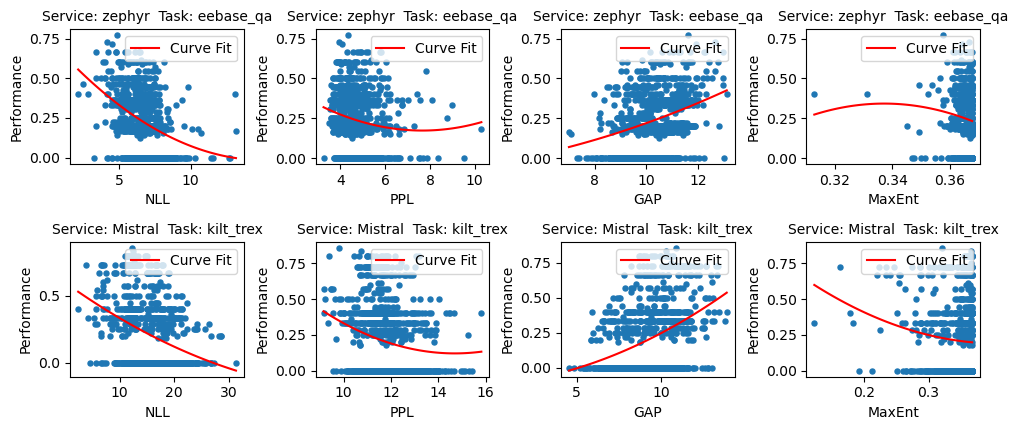

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pickle

# Assuming 'files' is a list of file paths

# Select specific files for processing
files_to_process = [files[4], files[21]]
# files_to_process = []
# for i in range(21,30):
    # files_to_process.append(files[i])

# Initialize figure and axes
fig, axs = plt.subplots(2, 4, figsize=(10, 4.4))
# 设置刻度字体大小
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# 设置坐标标签字体大小

for idx, file in enumerate(files_to_process):
    with open(file, 'rb') as f:
        return_list = pickle.load(f)
    f.close()
    match = re.match(pattern, file.replace('pkls_opt_cbqa\\',''))
    if match:
        dataset_name = match.group(1)  # 提取数据集名称
        model_name = match.group(3).rstrip('.pkl').split('-')[0]   # 提取模型名称
        seed = match.group(2)
    confs = [-1 * conf for conf in return_list["confs"]]
    accs = return_list["accs"]
    ppls = return_list["ppls"]
    gaps = [tensor.item() for tensor in return_list["gaps"]]
    entropys = [tensor.item() for tensor in return_list["entropys"]]
    names = ['NLL', 'PPL', 'GAP', 'MaxEnt']

    # Iterate over each metric and corresponding subplot
    for i, (metric, name) in enumerate(zip([confs, ppls, gaps, entropys], names)):
        row = idx
        col = i
        axs[row, col].scatter(metric, accs, s=13)

        # Define polynomial function for curve fitting
        def polynomial_func(x, a, b, c):
            return a * x ** 2 + b * x + c

        # Fit curve to the data
        popt, _ = curve_fit(polynomial_func, metric, accs)

        # Generate points for the fitted curve
        x_values = np.linspace(min(metric), max(metric), 100)
        y_values = polynomial_func(x_values, *popt)
        # Plot the fitted curve
        axs[row, col].plot(x_values, y_values, color='red', label='Curve Fit')
        axs[row, col].legend(loc='upper right', bbox_to_anchor=(1, 1))
        axs[row, col].set_title(f'Service: {model_name}  Task: {dataset_name.lstrip("crossfit_")}', fontsize=10)
        # Set labels and title for the subplot
        axs[row, col].set_xlabel(name)
        axs[row, col].set_ylabel('Performance')
        # axs[row, col].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig('case.pdf')
plt.show()


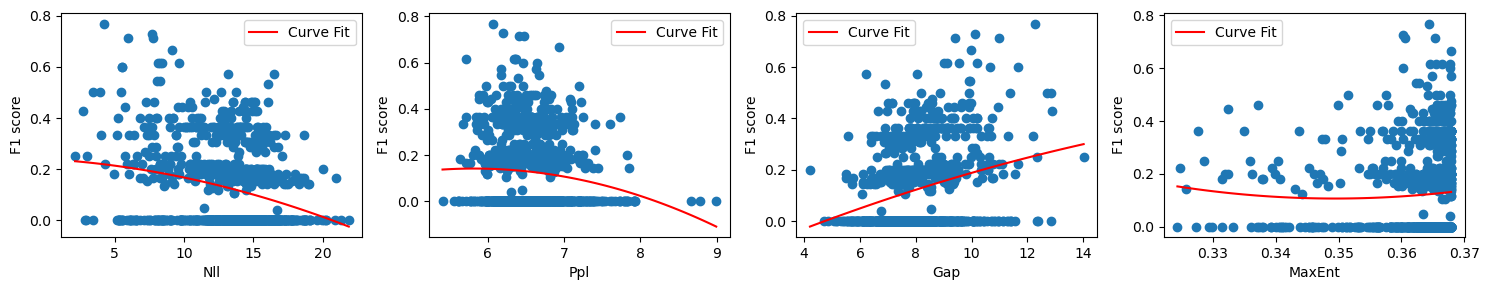

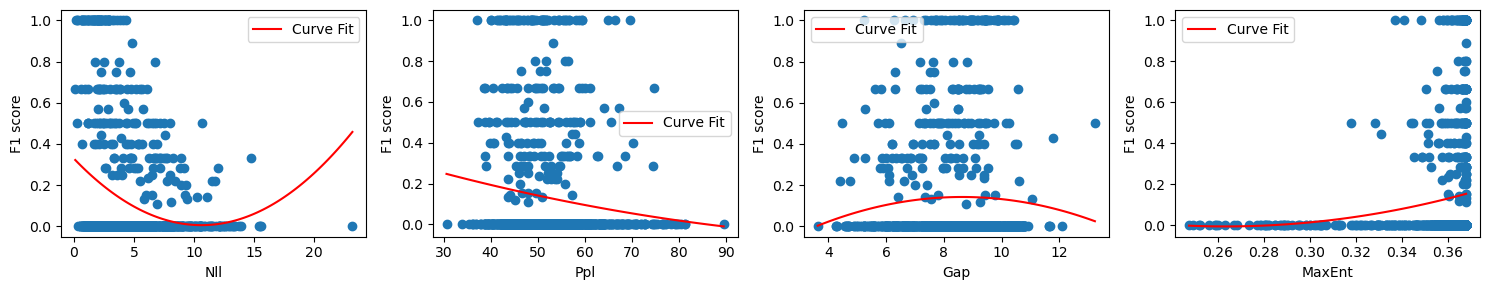

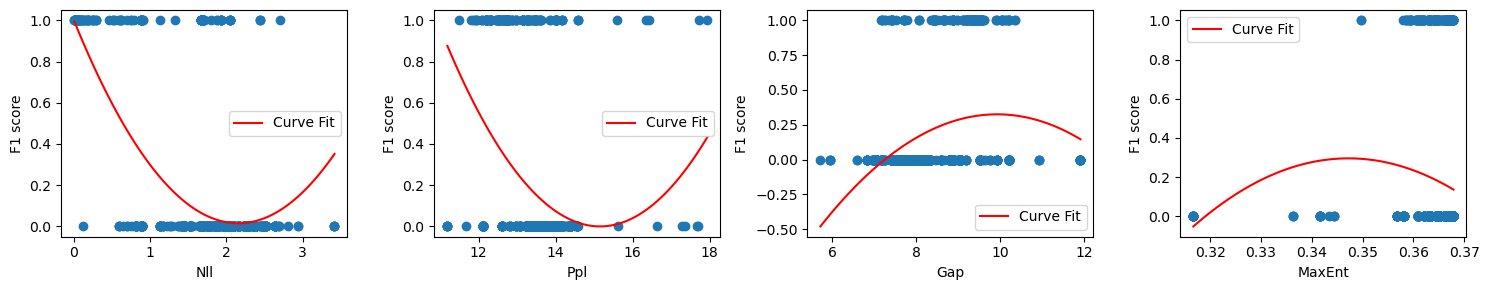

In [9]:
for file in [files[60],files[18],files[48]]:
# for file in files[60:]:
    with open(file,'rb') as f:
        return_list = pickle.load(f)
    # 使用加载的数据
    confs = [-1* conf for conf in return_list["confs"]]
    accs = return_list["accs"]
    #     embeds = return_list["embeds"]
    ppls = return_list["ppls"]
    gaps = [tensor.item() for tensor in return_list["gaps"]]
    entropys = [tensor.item() for tensor in return_list["entropys"]]
    names = ['Nll', 'Ppl', 'Gap', 'MaxEnt']

    # Create a figure and subplots
    fig, axs = plt.subplots(1, len(names), figsize=(15, 3))

    # Iterate through each metric
    for i, (metric, name) in enumerate(zip([confs, ppls, gaps, entropys], names)):
        # Sort the metric and get the sorted indices
        sorted_indices = sorted(range(len(metric)), key=lambda k: metric[k])
        sorted_metric = [metric[idx] for idx in sorted_indices]
        sorted_acc_lst = [accs[idx] for idx in sorted_indices]

        # Scatter plot of sorted metric vs accuracy
        axs[i].scatter(sorted_metric, sorted_acc_lst)

        # Define a polynomial function for curve fitting
        def polynomial_func(x, a, b, c):
            return a * x**2 + b * x + c

        # Fit the curve to the data
        popt, _ = curve_fit(polynomial_func, sorted_metric, sorted_acc_lst)
        # Generate points for the fitted curve
        x_values = np.linspace(min(sorted_metric), max(sorted_metric), 100)
        y_values = polynomial_func(x_values, *popt)
        # Plot the fitted curve
        axs[i].plot(x_values, y_values, color='red', label='Curve Fit')

        # Set labels and title for the subplot
        axs[i].set_xlabel(name)
        axs[i].set_ylabel('F1 score')
        axs[i].legend()

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

In [ ]:
avg_correlation_matrix = sum_correlation_matrix/65

In [ ]:
avg_correlation_matrix

In [28]:
avg_correlation_matrix = [[ 1.        , 0.18776197,  -0.59780646, 0.06446067,  -0.27113766],
       [0.18776197,  1.        , -0.16658965,  0.01503432, -0.12724436],
       [-0.59780646, -0.16658965,  1.        , -0.16234864,  0.21665892], 
       [0.06446067,  0.01503432, -0.16234864,  1.        , -0.04147624],
       [-0.27113766, -0.12724436,  0.21665892, -0.04147624,  1.        ]]

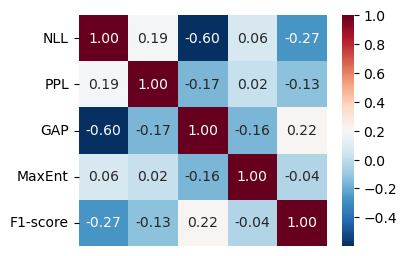

In [31]:
import seaborn as sns

plt.figure(figsize=(4, 3))
sns.heatmap(avg_correlation_matrix, annot=True, cmap='RdBu_r', fmt=".2f", 
            # xticklabels=['NLL', 'PPL', 'GAP', 'MaxEnt', 'F1-score'], 
            xticklabels = [],
            yticklabels=['NLL', 'PPL', 'GAP', 'MaxEnt', 'F1-score'])
plt.savefig('heatmap.pdf', dpi=1000, bbox_inches = 'tight')

In [ ]:
avg_correlation_matrix

In [ ]:
def cal_best_fea(abs_matrix):
    #  获取特征与准确度之间的相关性系数
    corr_with_accuracy = abs_matrix[-1, :-1]  # 最后一行除了最后一个元素之外的部分 
    upper_triangle = np.triu(abs_matrix, k=1)[:, :-1]
    # 查看非零元素的个数
    # nonzero_count = np.count_nonzero(upper_triangle)
    if (len(abs_matrix)-2)!=0:
        return np.sum(corr_with_accuracy) - np.sum(upper_triangle)/2
    else:
        return np.sum(corr_with_accuracy) - np.sum(upper_triangle)/2

In [ ]:
def cal_best_fea(abs_matrix):
    #  获取特征与准确度之间的相关性系数
    corr_with_accuracy = abs_matrix[-1, :-1]  # 最后一行除了最后一个元素之外的部分 
    new_corr = []
    # # 计算特征与其他特征之间的相关性系数的平均值
    for i,v in enumerate(corr_with_accuracy):
        other_corr = np.sum(abs_matrix[i,:-1])-1
        if (len(abs_matrix)-2)!=0: 
            new_corr.append(corr_with_accuracy[i] - other_corr/(len(abs_matrix)-2))
        else:
            new_corr.append(corr_with_accuracy[i])
    # 计算指标
    return new_corr

In [ ]:
abs_matrix = np.abs(avg_correlation_matrix)

In [ ]:
0.27113766+0.12724436-0.18776197

In [ ]:
# 获取对角线以上的元素
upper_triangle = np.triu(abs_matrix, k=1)[:, :-1]
upper_triangle 

In [ ]:
results = cal_best_fea(abs_matrix)
# 将新特征矩阵添加到列表中
print(results, sum(results))

In [ ]:
[[1.         0.18776197 0.59780646 0.27113766]
 [0.18776197 1.         0.16658965 0.12724436]
 [0.59780646 0.16658965 1.         0.21665892]
 [0.27113766 0.12724436 0.21665892 1.        ]]

In [ ]:
0.27113766+0.12724436+0.21665892-(0.16658965+0.59780646+0.18776197)/2

In [ ]:
from itertools import combinations
# 假设您希望分别去掉 1 个、2 个和 3 个特征
num_features_to_remove = [0, 1, 2, 3]
# 初始化一个字典，用于存储不同数量特征被去掉后得到的新特征矩阵
new_correlation_matrices = {}
# 分别去掉 1 个、2 个和 3 个特征，计算新特征矩阵
for num_remove in num_features_to_remove:
    # 获取所有可能的特征组合，每个组合中去掉 num_remove 个特征
    remove_combinations = combinations(range(4), num_remove)
    # 初始化一个列表，用于存储每个组合下的新特征矩阵
    for remove_indices in remove_combinations:
        # 创建一个新的相关性矩阵，不包含要删除的特征
        new_correlation_matrix = np.delete(abs_matrix, remove_indices, axis=0)  # 删除相应的行
        new_correlation_matrix = np.delete(new_correlation_matrix, remove_indices, axis=1)  # 删除相应的列
        print(new_correlation_matrix)
        results = cal_best_fea(new_correlation_matrix)
        # 将新特征矩阵添加到列表中
        print(results, results/(4-num_remove))
        print('\n')

In [ ]:
abs_matrix = np.abs(correlation_matrix)

In [ ]:
# 假设您想要删除的特征索引为2，即第三个特征
feature_to_remove_index = [1,2,3]

# 创建一个新的相关性矩阵，不包含要删除的特征
new_correlation_matrix = np.delete(correlation_matrix, feature_to_remove_index, axis=0)  # 删除相应的行
new_correlation_matrix = np.delete(new_correlation_matrix, feature_to_remove_index, axis=1)  # 删除相应的列

print("New correlation matrix after removing the third feature:")
print(new_correlation_matrix)

In [ ]:
abs_matrix[1,:]

In [ ]:
(0.10007739+0.81518831+0.08058109)/3

In [ ]:
0.11749096-(0.10007739+0.81518831+0.08058109)/3

In [ ]:
score

In [ ]:
def custom_sort(corr_element):
    # 计算第二个元素和第三个元素的绝对值之间的差值
    diff = abs(corr_element[1]) - abs(corr_element[2])
    return -diff

# 按照自定义的排序函数对 corr_dict 中的元素进行排序
sorted_corr_dict = sorted(corr_dict.items(), key=lambda x: custom_sort(x[1]))

# 输出排序后的结果
for dataset_model, corr in sorted_corr_dict[:5]:
    print(f"{dataset_model}: {corr}")

In [ ]:
# 将列表转换为二维数组，以便进行求和操作
corrs_array = np.vstack(corrs)
# 沿着纵向对数组进行求和，得到结果
sum_along_columns = [round(x,2) for x in np.sum(corrs_array, axis=0)]
sum_along_columns

In [ ]:
import seaborn as sns

# 将特征列表和准确度列表组合成一个二维数组
data = np.array([confs, ppls, gaps, entropys, accs])

# 计算相关系数矩阵
correlation_matrix = np.corrcoef(data)
# 绘制热力图
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='BuGn', fmt=".2f", 
            xticklabels=['confs', 'ppls', 'gaps', 'entropys', 'accuracy'], 
            yticklabels=['confs', 'ppls', 'gaps', 'entropys', 'accuracy'])